In [1]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os
import torch
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from SNN import FeedForward, SiameseDataSet, SiameseModel, seed_everything
import seaborn as sns
import matplotlib.pyplot as plt   
import numpy as np
import random

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target
OneHot = OneHotEncoder(sparse=False)
y = OneHot.fit_transform(y.reshape((y.shape[0], 1)))

In [3]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [4]:
y.shape

(150, 3)

In [5]:
np.sum(y, axis=0)

array([50., 50., 50.])

# Define and Train Model

In [6]:
seed_everything(69)

In [7]:
MyFeedForward = FeedForward(2, [3])

In [8]:
MyFeedForward

FeedForward(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=3, bias=True)
  )
)

In [9]:
MySNN = SiameseModel(MyFeedForward, predict_unknown = False, class_min_train=5, 
                     n_example_predict=10, learning_rate=1.0e-3, num_epochs = 10, batch_size = 10, rand_seed=69)

In [10]:
# list(MySNN.logistic.parameters()) + list(MySNN.model.parameters())

In [11]:
MyTrainer = Trainer(model = MySNN, scale_X = True, use_pca = True, n_components = 2)

In [12]:
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score)

In [13]:
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, n_splits=n_splits)

In [14]:
MyMultiTrainTester.train(X, y)

Running for split 1 of 5
Training Encoder
#########################################
Epoch 1 of 10
__Training__
2021-03-08 04:18:32
MEAN LOSS: 0.3074653141532093
__Validation__
2021-03-08 04:18:34
MEAN LOSS: 0.2816459999078571
#########################################
Epoch 2 of 10
__Training__
2021-03-08 04:18:34
MEAN LOSS: 0.2155926410567481
__Validation__
2021-03-08 04:18:36
MEAN LOSS: 0.27445203925941464
#########################################
Epoch 3 of 10
__Training__
2021-03-08 04:18:37
MEAN LOSS: 0.19798029849147425
__Validation__
2021-03-08 04:18:39
MEAN LOSS: 0.2766010980410996
#########################################
Epoch 4 of 10
__Training__
2021-03-08 04:18:39
MEAN LOSS: 0.18947875902804082
__Validation__
2021-03-08 04:18:41
MEAN LOSS: 0.27846343939055956
#########################################
Epoch 5 of 10
__Training__
2021-03-08 04:18:42
MEAN LOSS: 0.18439177402803908
__Validation__
2021-03-08 04:18:44
MEAN LOSS: 0.28025717724158244
################################

MEAN LOSS: 0.2340418621584773
__Validation__
2021-03-08 04:20:20
MEAN LOSS: 0.22275873036882451
#########################################
Epoch 4 of 10
__Training__
2021-03-08 04:20:20
MEAN LOSS: 0.22758300370015205
__Validation__
2021-03-08 04:20:22
MEAN LOSS: 0.2195846310856104
#########################################
Epoch 5 of 10
__Training__
2021-03-08 04:20:22
MEAN LOSS: 0.22305460786484183
__Validation__
2021-03-08 04:20:25
MEAN LOSS: 0.21778736492194753
#########################################
Epoch 6 of 10
__Training__
2021-03-08 04:20:25
MEAN LOSS: 0.2199812770590186
__Validation__
2021-03-08 04:20:27
MEAN LOSS: 0.21664035767249756
#########################################
Epoch 7 of 10
__Training__
2021-03-08 04:20:27
MEAN LOSS: 0.21800037101656197
__Validation__
2021-03-08 04:20:29
MEAN LOSS: 0.21633520110449095
#########################################
Epoch 8 of 10
__Training__
2021-03-08 04:20:29
MEAN LOSS: 0.21668359519615768
__Validation__
2021-03-08 04:20:32
MEAN LO

In [15]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,0.958333,train
1,0.950000,train
2,0.966667,train
3,0.925000,train
4,0.933333,train
0,0.900000,test
1,0.933333,test
2,0.866667,test
3,1.000000,test
4,1.000000,test


<AxesSubplot:xlabel='stage', ylabel='score'>

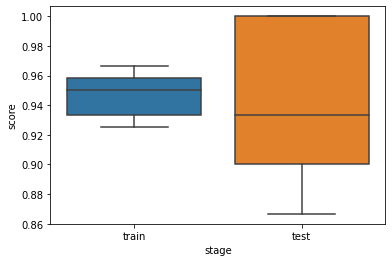

In [16]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

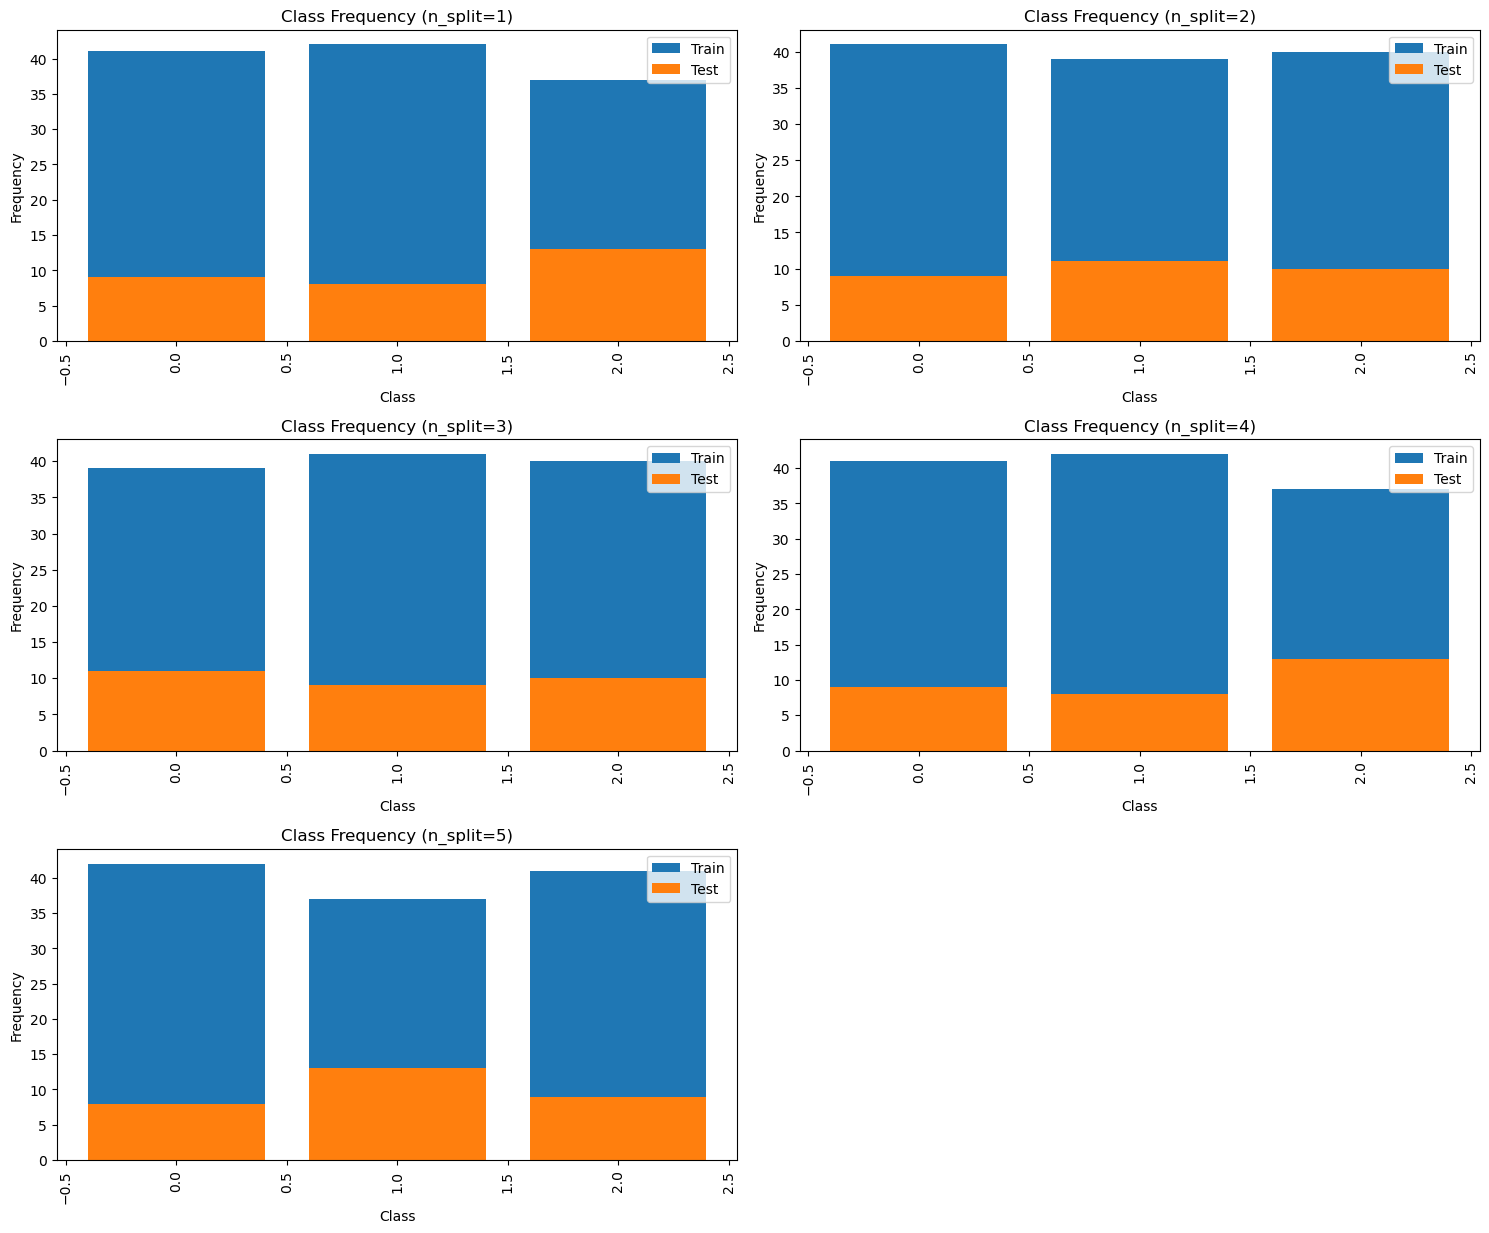

In [17]:
MyMultiTrainTester.plot_class_freq(normalize=True)

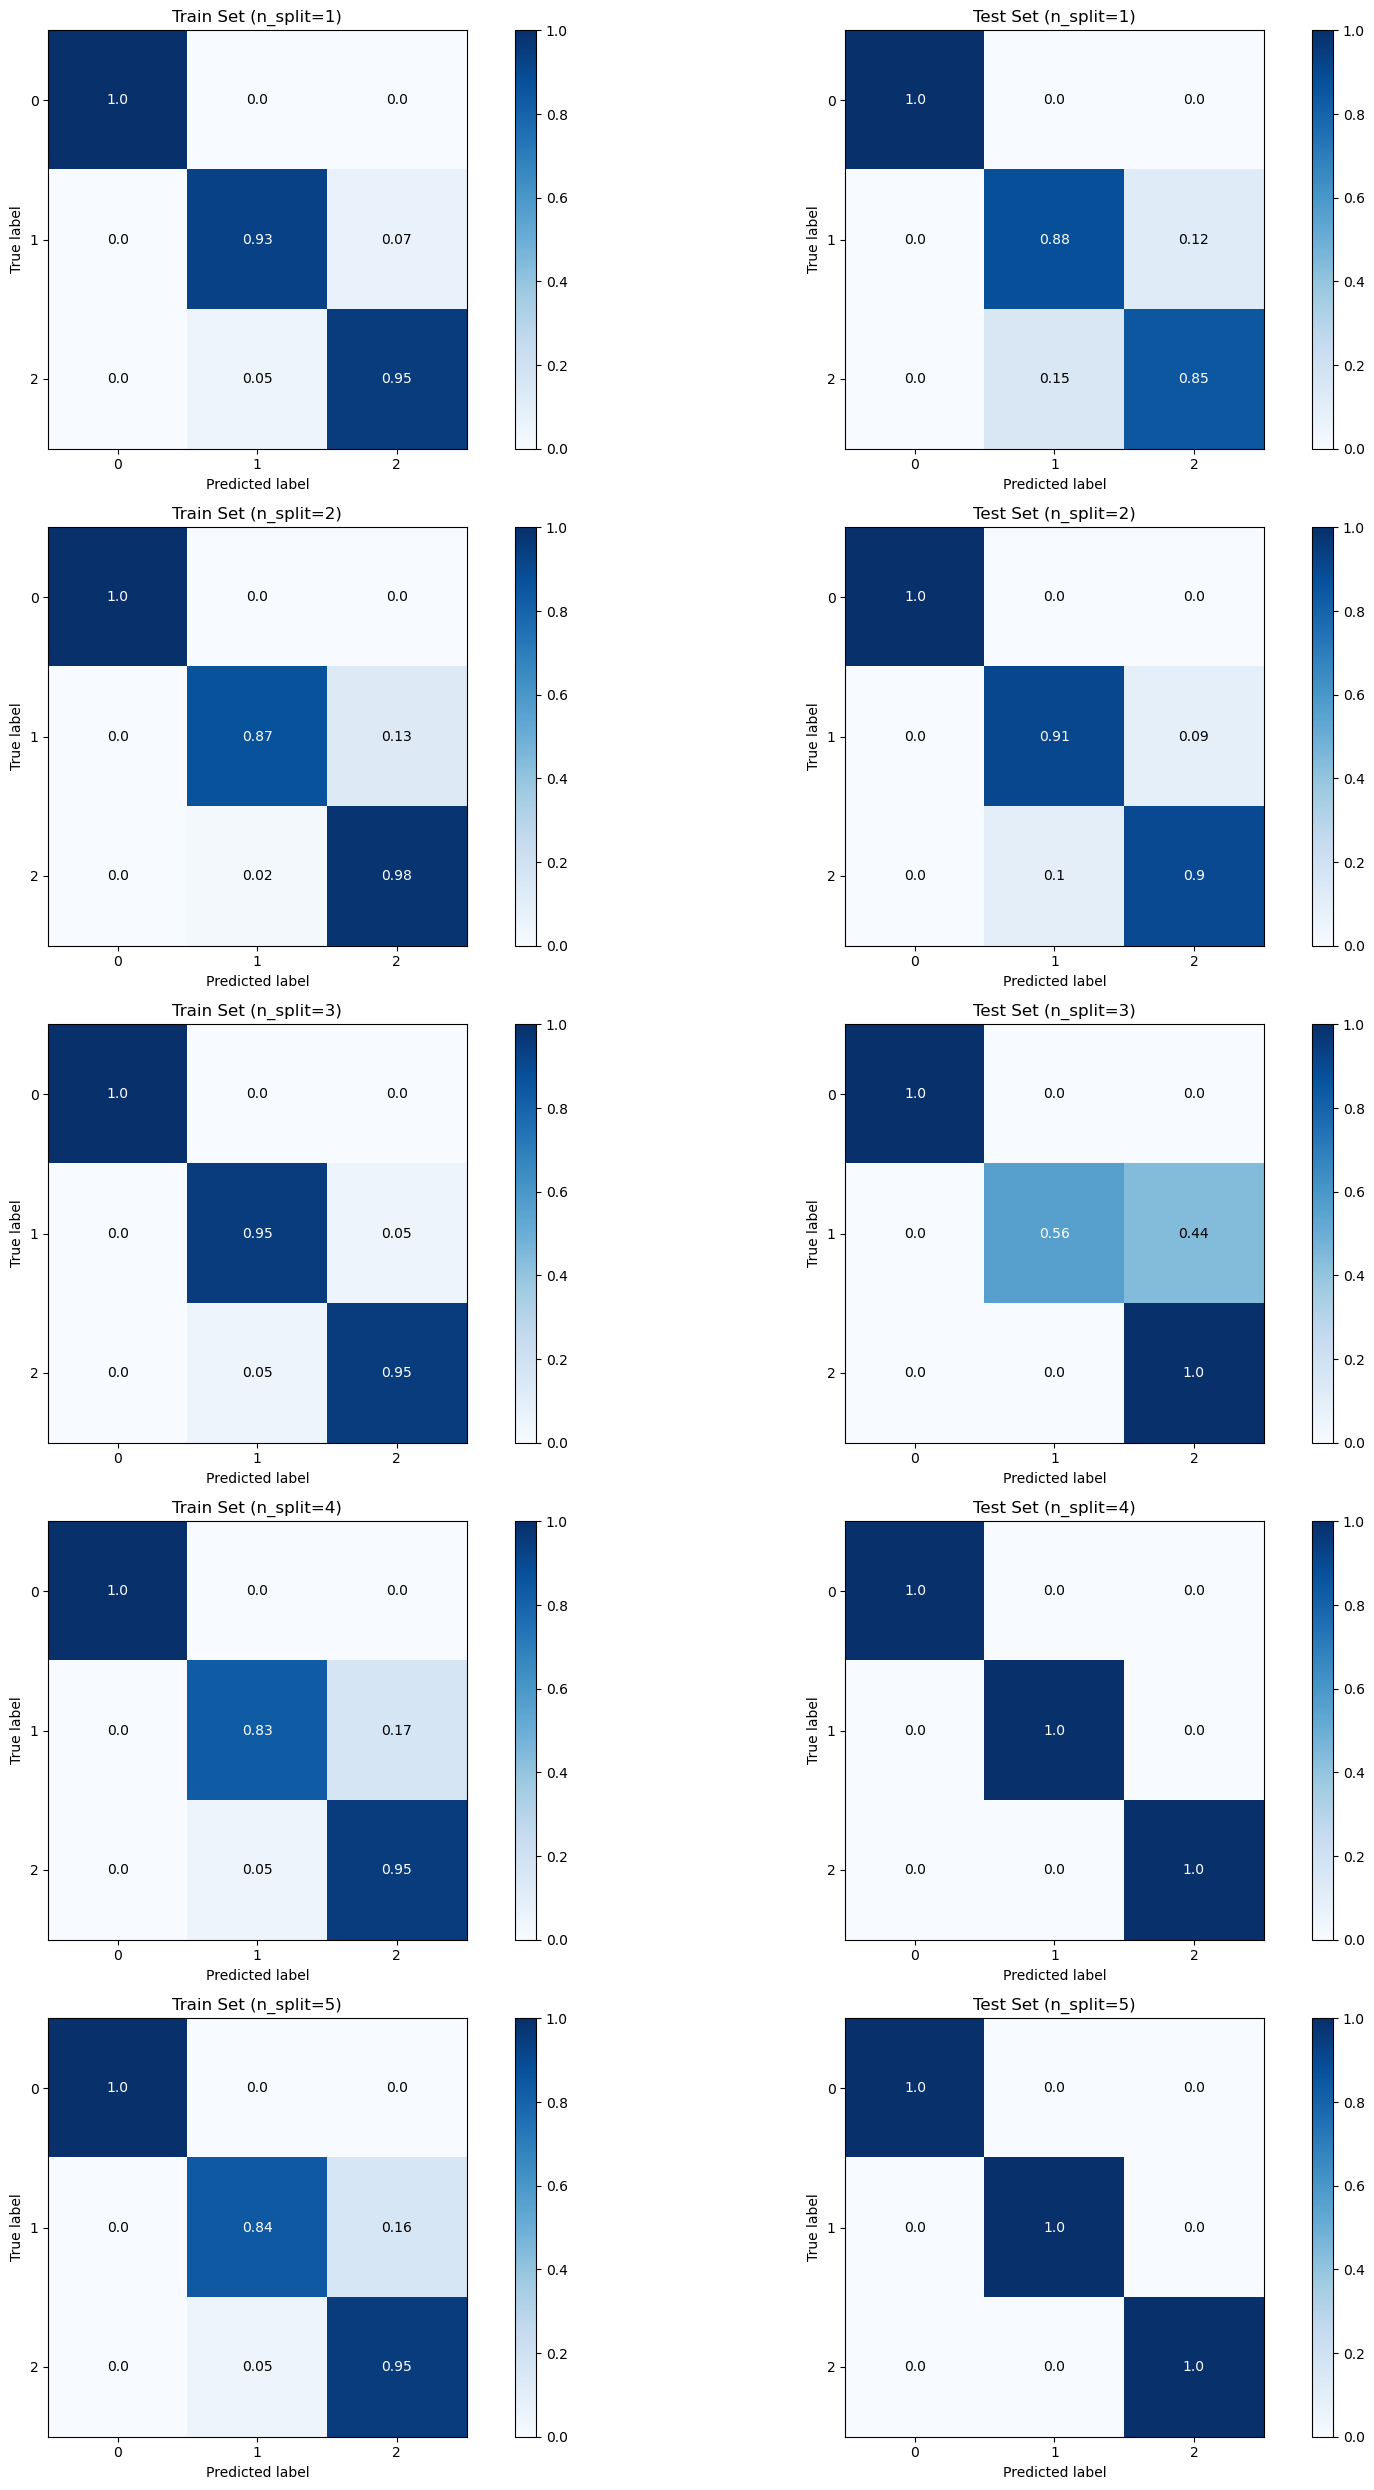

In [18]:
MyMultiTrainTester.plot_confusion(normalize=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


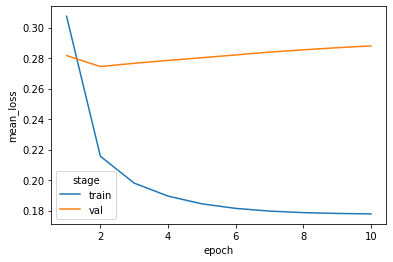

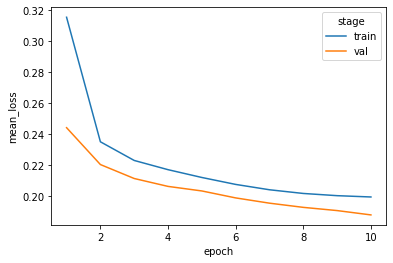

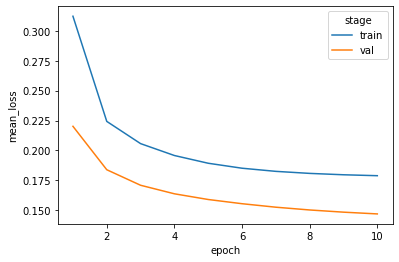

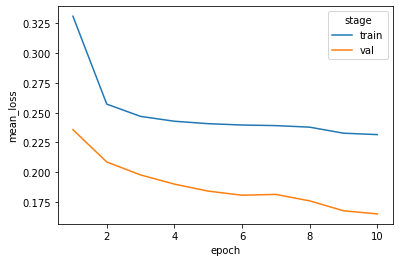

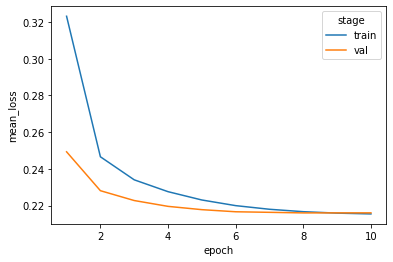

In [19]:
for i, trainer in enumerate(MyMultiTrainTester.TrainerList):
    plt.figure(i)
    print(sns.lineplot(data=trainer.model.TrainStats, x='epoch', y='mean_loss', hue = 'stage'))

### Examine Data In Encoded Space

In [20]:
Trainer_use = MyMultiTrainTester.TrainerList[0]

In [21]:
X_transform = Trainer_use.transform_X(X)

In [22]:
X_encoded = Trainer_use.model.model.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [23]:
# X_encoded = MyFeedForward.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [24]:
X_encoded.shape

(150, 3)

In [25]:
y_label = Trainer_use.model.one_hot.inverse_transform(y).astype('str')
y_pred = Trainer_use.model.predict(X_transform)
y_pred = Trainer_use.model.one_hot.inverse_transform(y_pred).astype('str')

In [26]:
X_enc_df = pd.DataFrame(X_encoded, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
X_enc_df['y'] = y_label
X_enc_df['y_pred'] = y_pred

In [27]:
X_enc_df

,X1,X2,X3,y,y_pred
0,0.0,14.064483,0.0,0,0
1,0.0,13.265269,0.0,0,0
2,0.0,13.831280,0.0,0,0
3,0.0,13.449883,0.0,0,0
4,0.0,14.285542,0.0,0,0
...,...,...,...,...,...
145,0.0,5.269292,0.0,2,2
146,0.0,5.281681,0.0,2,2
147,0.0,5.714013,0.0,2,2
148,0.0,5.949456,0.0,2,2


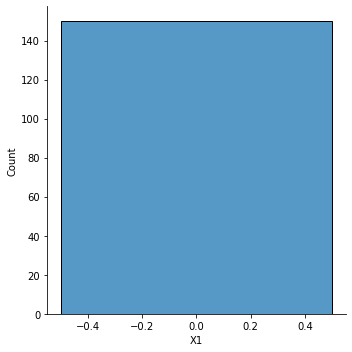

In [28]:
sns.displot(X_enc_df['X1'])

In [29]:
def do_plot(df, x, y, hue):
    if x in df.columns and y in df.columns and hue in df.columns:
        sns.scatterplot(data=df, x=x, y=y, hue = hue)

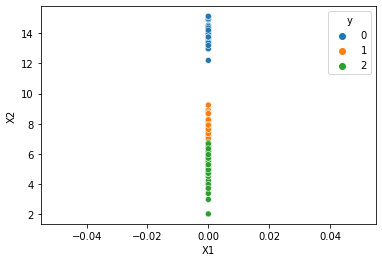

In [30]:
do_plot(X_enc_df, 'X1', 'X2', 'y')

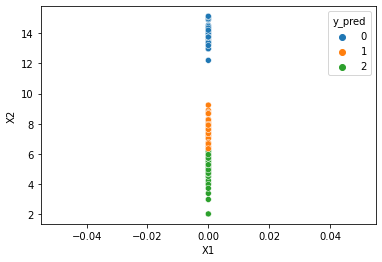

In [31]:
do_plot(X_enc_df, 'X1', 'X2', 'y_pred')

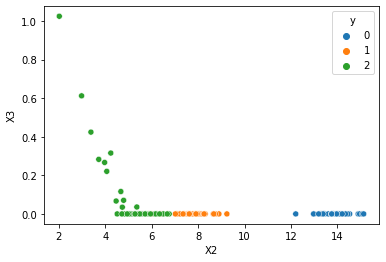

In [32]:
do_plot(X_enc_df, 'X2', 'X3', 'y')

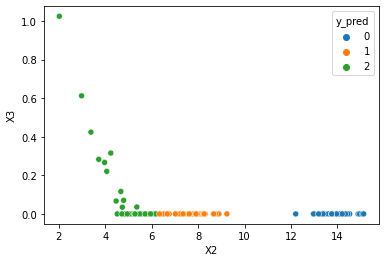

In [33]:
do_plot(X_enc_df, 'X2', 'X3', 'y_pred')

In [34]:
do_plot(X_enc_df, 'X3', 'X4', 'y')

### Examine Data In Original Space

In [35]:
X_df = pd.DataFrame(X, columns = ['X1', 'X2', 'X3', 'X4'])
X_df['y'] = y_label

<AxesSubplot:xlabel='X1', ylabel='X2'>

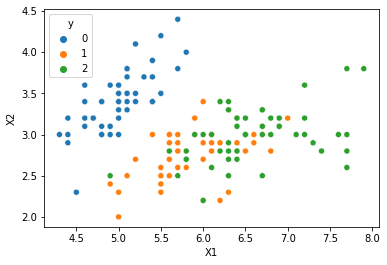

In [36]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue = 'y')

<AxesSubplot:xlabel='X3', ylabel='X4'>

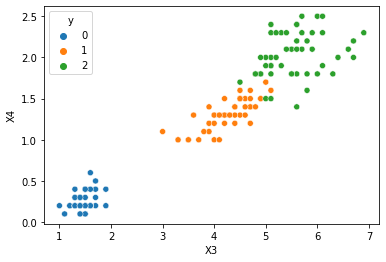

In [37]:
sns.scatterplot(data=X_df, x='X3', y='X4', hue = 'y')